## Yahoo Finance API
https://theautomatic.net/yahoo_fin-documentation/#methods 

Taking in News data

Common News Outlets:
Reuters,
Bloomberg,
Techcrunch,
Invesopedia,
TheStreet,
Buisness Insider,
StockStory,
MT Newswires,
Associated Press Finance,
Motley Fool,
Stock Market Alerts,
SmartAsset,
Fortune,
Morningstar Research,
Investor's Buisness Daily,
Barrons.com,
Benzinga




In [ ]:
pip install yahoo_fin

In [87]:
import yahoo_fin.stock_info as si
from yahoo_fin import news 
news = news.get_yf_rss("ntgr")
print(news[0])

title_padding = 55 
published_padding = 25
link_padding = 90 

print(f"{'Summary'.ljust(title_padding)}   {'Published'.ljust(published_padding)}   {'Link'.ljust(link_padding)}")
print("=" * (title_padding + published_padding + link_padding))

for article in news:
    cropped_title = article['title'][:title_padding - 3] + "..." if len(article['title']) > title_padding else article['title']
    published = article['published'][:published_padding]  
    
    print(f"{cropped_title.ljust(title_padding)}   {published.ljust(published_padding)}   {article['link']}")


{'summary': 'Investing.com -- It’s an exciting time to be a shareholder of NetGear (NASDAQ:NTGR).', 'summary_detail': {'type': 'text/html', 'language': None, 'base': 'https://feeds.finance.yahoo.com/rss/2.0/headline?s=ntgr&region=US&lang=en-US', 'value': 'Investing.com -- It’s an exciting time to be a shareholder of NetGear (NASDAQ:NTGR).'}, 'id': 'ff5bb63a-e94a-37c3-9828-d7d77ce042d8', 'guidislink': False, 'links': [{'rel': 'alternate', 'type': 'text/html', 'href': 'https://finance.yahoo.com/news/netgear-soaring-key-investors-bullish-184013025.html?.tsrc=rss'}], 'link': 'https://finance.yahoo.com/news/netgear-soaring-key-investors-bullish-184013025.html?.tsrc=rss', 'published': 'Thu, 12 Sep 2024 18:40:13 +0000', 'published_parsed': time.struct_time(tm_year=2024, tm_mon=9, tm_mday=12, tm_hour=18, tm_min=40, tm_sec=13, tm_wday=3, tm_yday=256, tm_isdst=0), 'title': 'NetGear is soaring, and key investors are as  bullish as ever', 'title_detail': {'type': 'text/plain', 'language': None, 'b

## Robinhood API

In [ ]:
pip install robin_stocks

In [2]:
import robin_stocks.robinhood as r
import getpass

username = input("Enter your Robinhood username: ")
password = getpass.getpass("Enter your Robinhood password: ")

r.login(username, password)


{'access_token': 'eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCJ9.eyJkY3QiOjE3MjYxOTc0MTIsImRldmljZV9oYXNoIjoiNzE3YmJkNWJhMGYyMDI0NjZkNmY5ZmZlNmYwZmZlZTYiLCJleHAiOjE3MjcxOTQ0MTAsImxldmVsMl9hY2Nlc3MiOmZhbHNlLCJtZXRhIjp7Im9pZCI6ImM4MlNIMFdaT3NhYk9YR1Ayc3hxY2ozNEZ4a3ZmbldSWkJLbEJqRlMiLCJvbiI6IlJvYmluaG9vZCJ9LCJvcHRpb25zIjp0cnVlLCJzY29wZSI6ImludGVybmFsIiwic2VydmljZV9yZWNvcmRzIjpbeyJoYWx0ZWQiOmZhbHNlLCJzZXJ2aWNlIjoibnVtbXVzX3VzIiwic2hhcmRfaWQiOjEsInN0YXRlIjoiYXZhaWxhYmxlIn0seyJoYWx0ZWQiOmZhbHNlLCJzZXJ2aWNlIjoiYnJva2ViYWNrX3VzIiwic2hhcmRfaWQiOjcsInN0YXRlIjoiYXZhaWxhYmxlIn1dLCJzbGciOjEsInNscyI6ImNxc2hwS1ArWk4vUWt6MmNpZFpraU00cUVuZllOeTlFc0JwUnI4b1FBV0ZPWkN4T1d0d295MXhiRWdSUHltMVJGS1RIeFFRTlFNYVdBKzBKVkZwdEN3PT0iLCJzcm0iOnsiYiI6eyJobCI6ZmFsc2UsInIiOiJ1cyIsInNpZCI6N30sIm4iOnsiaGwiOmZhbHNlLCJyIjoidXMiLCJzaWQiOjF9fSwidG9rZW4iOiJkYXQ5RVlWUkJZWTl2QmhwdjhvaXYzSXdSQUk0TlQiLCJ1c2VyX2lkIjoiMjU0MzI0ZmUtMDU3Yy00NmU5LWIwZmUtYmE0ZjA5MjI0NjAwIiwidXNlcl9vcmlnaW4iOiJVUyJ9.OhdZuFuSxTkm0BLO55jIy1hovOZHur8fpLs-JHZDapacYeJG

In [4]:
import pandas as pd

movers = r.get_top_movers()  
movers_df = pd.DataFrame(movers)

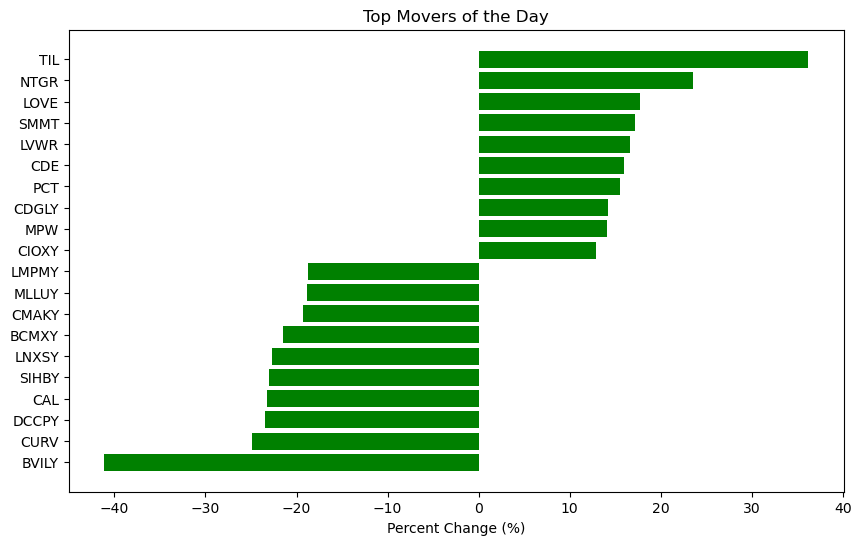

In [40]:
import matplotlib.pyplot as plt 
# print(movers_df.info())
# print(movers_df.head())

if 'bid_price' in movers_df.columns and 'last_non_reg_trade_price' in movers_df.columns:
    movers_df['current_price'] = movers_df['last_trade_price']
    movers_df['previous_close_price'] = movers_df['adjusted_previous_close']
else:
    print("Columns 'bid_price' and/or 'last_non_reg_trade_price' not found.")

movers_df.dropna(subset=['current_price', 'previous_close_price'], inplace=True)

movers_df['percent_change'] = ((movers_df['current_price'].astype(float) - movers_df['previous_close_price'].astype(float)) / movers_df['current_price'].astype(float)) * 100

top_movers = movers_df[['symbol', 'percent_change']].head(20).sort_values('percent_change')

plt.figure(figsize=(10, 6))
plt.barh(top_movers['symbol'], top_movers['percent_change'], color='green')
plt.xlabel('Percent Change (%)')
plt.title('Top Movers of the Day')
plt.show()

## Combined APIs

In [18]:
import robin_stocks.robinhood as r
import getpass
import yahoo_fin.stock_info as si
from yahoo_fin import news 
import time
import pandas as pd

movers = r.get_top_movers()  
movers_df = pd.DataFrame(movers)

data_list = []

for idx, mover in movers_df.iterrows():
    # print(mover['symbol'].lower())
    # print(type(mover['symbol']))
    # print(len(mover['symbol']))
    # time.sleep(0.5) . #Be careful a delay may need to be added
    articles = news.get_yf_rss(mover['symbol'].lower())
    percent_change = (((float(mover['last_trade_price']) - float(mover['adjusted_previous_close'])) / float(mover['last_trade_price'])) * 100)
    row = {
        'symbol': mover['symbol'],
        'open_price': mover['adjusted_previous_close'],
        'current_price': mover['last_trade_price'],
        'percent_change' : percent_change, 
        'article_1': [articles[0]['title'], articles[0]['published'], articles[0]['link']] if len(articles) > 0 else None,
        'article_2': [articles[1]['title'], articles[1]['published'], articles[1]['link']] if len(articles) > 1 else None,
        'article_3': [articles[2]['title'], articles[2]['published'], articles[2]['link']] if len(articles) > 2 else None,
        'article_4': [articles[3]['title'], articles[3]['published'], articles[3]['link']] if len(articles) > 3 else None,
        'article_5': [articles[4]['title'], articles[4]['published'], articles[4]['link']] if len(articles) > 4 else None,

    }
    # print(row)
    data_list.append(row)

data_df = pd.DataFrame(data_list)
